In [8]:
import numpy as np
import pandas as pd
import time
import threading
import matplotlib.pyplot as plt

In [9]:
def generate_matrices(n, size):
    matrices = []
    for i in range(n):
        matrices.append(np.random.rand(size, size))
    return matrices

def matrix_multiply(matrices,matrix_size):
    constant_matrix = np.random.rand(matrix_size, matrix_size)
    result = constant_matrix.copy()
    for matrix in matrices:
        result = np.dot(result, matrix)
    return result

def matrix_multiplication_using_threads(num_threads,matrices,size):
    start_time = time.time()
    threads = []
    for i in range(0, len(matrices), num_threads):
        thread = threading.Thread(target=matrix_multiply, args=(matrices[i:i+num_threads],size))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()
    end_time = time.time()
    return end_time - start_time


In [10]:
num_matrices = 100
size = 2000

matrices = generate_matrices(num_matrices,size)

In [12]:
results = {}
for num_threads in range(1, 9):
    time_taken = matrix_multiplication_using_threads(num_threads,matrices,size)
    results[num_threads] = time_taken
    print(f'Time Taken by {num_threads} threads: {results[num_threads]}')

Time Taken by 1 threads: 13.157055139541626
Time Taken by 2 threads: 12.18849515914917
Time Taken by 3 threads: 11.998364925384521
Time Taken by 4 threads: 12.248761892318726
Time Taken by 5 threads: 12.17979621887207
Time Taken by 6 threads: 13.046935319900513
Time Taken by 7 threads: 14.657249450683594
Time Taken by 8 threads: 13.665520429611206


In [13]:
results

{1: 13.157055139541626,
 2: 12.18849515914917,
 3: 11.998364925384521,
 4: 12.248761892318726,
 5: 12.17979621887207,
 6: 13.046935319900513,
 7: 14.657249450683594,
 8: 13.665520429611206}

In [14]:
data = pd.DataFrame.from_dict(results, orient='index',columns=['Time(sec)'])
data['Threads'] = results.keys()
data = data.reindex(columns=['Threads','Time(sec)'])
data.set_index('Threads',inplace=True)
data

,Time(sec)
Threads,
1,13.157055
2,12.188495
3,11.998365
4,12.248762
5,12.179796
6,13.046935
7,14.657249
8,13.665520


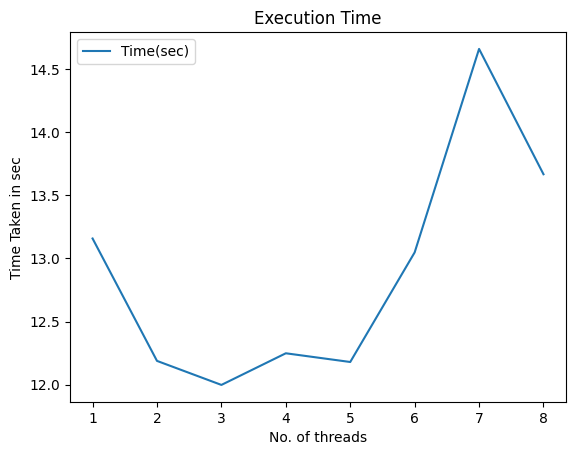

In [15]:
data.plot()
plt.xlabel('No. of threads')
plt.ylabel('Time Taken in sec')
plt.title('Execution Time')
plt.show()